## Observations and Insights 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
combined_df.count()
#combined_df['Mouse ID'].value_counts()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID_df = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_ID_df
#.set_index('Mouse ID')

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. --- same as above???
duplicate_IDs = combined_df.loc[combined_df['Mouse ID']== 'g989']
duplicate_IDs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df['Mouse ID']!= 'g989']
clean_df.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()
#clean_df.groupby('Drug Regimen').count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stat = pd.DataFrame({"Mean Tumor Volume": mean,
                  "Median Tumor Volume": median,
                  "Tumor Volume Variance": variance,
                  "Tumor Volume Std. Dev.": stdev,
                  "Tumor Volume Std. Err.": sem})
summary_stat
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_df = clean_df[['Drug Regimen','Tumor Volume (mm3)']]
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)': 'Volume'})

summary_stat2 = summary_df.groupby(['Drug Regimen']).Volume.agg(['mean','median','var','std','sem'])
summary_stat2 = summary_stat2.rename(columns = {'mean' : 'Mean Tumor Volume',
                                                       'median' : 'Median Tumor Volume',
                                                       'var': 'Tumor Volume Variance',
                                                       'std' : 'Tumor Volume Std. Dev.',
                                                       'sem' : 'Tumor Volume Std. Err.'})
summary_stat2


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Total Number of Mice')

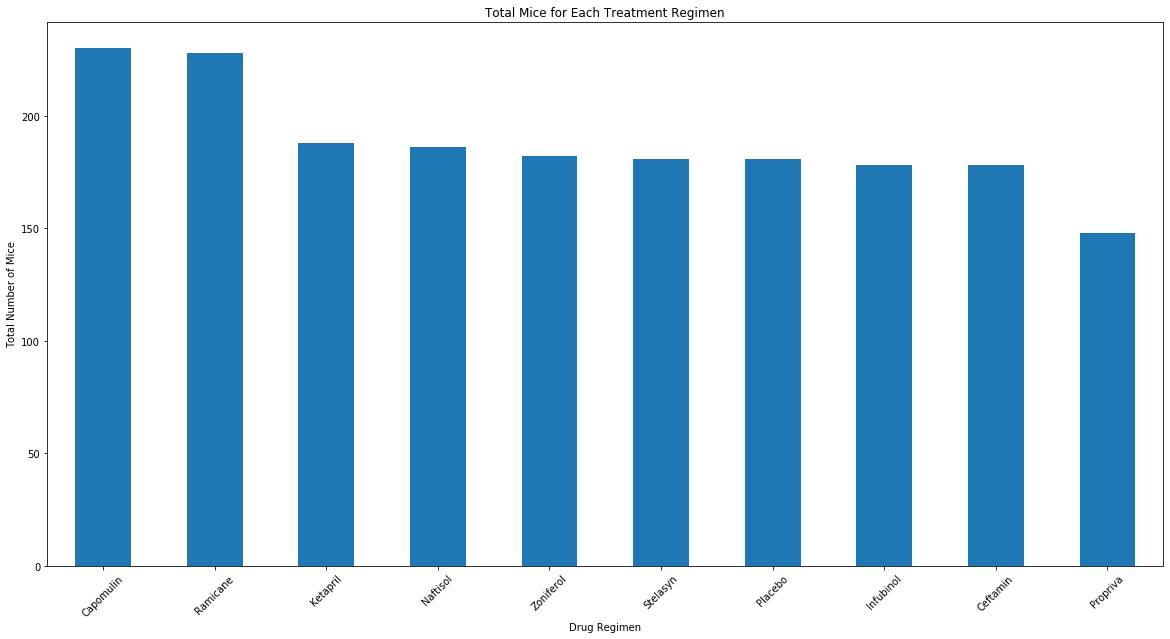

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pandas.

#Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of total 
#mice for each treatment regimen throughout the course of the study.

#Filter the dataframe down only to those columns to chart
mouse_reg = clean_df[['Mouse ID', 'Drug Regimen']]

#Set index to drug regimen
mouse_reg_group = mouse_reg.groupby('Drug Regimen').count()['Mouse ID']
mouse_reg_group = mouse_reg_group.sort_values(ascending=False)


#Use DataFrame.plot() in order to create a bar chart of the data
mouse_reg_plot = mouse_reg_group.plot(kind='bar', figsize=(20,10), align='center')

#Title and labels
mouse_reg_plot.set_title('Total Mice for Each Treatment Regimen')
plt.xticks(rotation=45)
mouse_reg_plot.set_ylabel('Total Number of Mice')
#mouse_reg_plot.tight_layout()

Text(0, 0.5, 'Total Number of Mice')

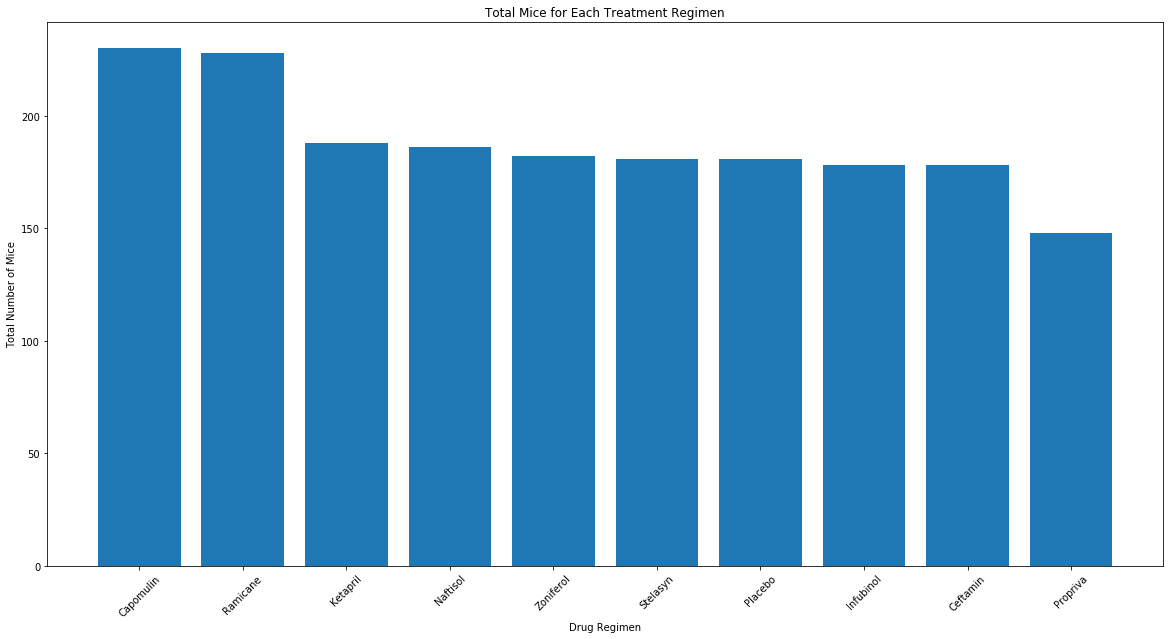

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the 
#study using pyplot.

total_mice = clean_df.groupby('Drug Regimen').count()['Mouse ID']
total_mice = total_mice.sort_values(ascending=False)
#print(total_mice)

regimen = total_mice.index

plt.figure(figsize=(20,10))
plt.bar(regimen,total_mice, align = 'center')
plt.xticks(rotation = '45')

plt.title('Total Mice for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
#plt.xlim(-.75, len(regimen)-.25)
#plt.ylim
#plt.tight_layout() ---????

#plt.show()

## Pie Plots

In [11]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Male      125
Female    124
Name: Sex, dtype: int64


Text(0, 0.5, 'Sex')

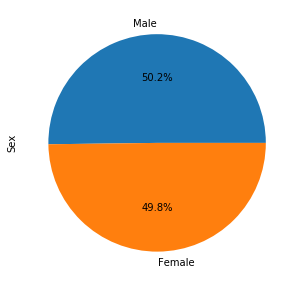

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = mouse_metadata['Sex'].value_counts() #----?
print(gender_df)
#gender_df = gender_df[['Mouse ID', 'Sex']]

#gender_df = gender_df.groupby('Sex').count()


gender_df.plot.pie(y='Mouse ID', figsize=(5,5),autopct='%1.1f%%')
plt.ylabel('Sex') #can i use plt for pandas?? if not, Don't know how to change y-axis to 'Sex'

In [13]:
gender_df

Male      125
Female    124
Name: Sex, dtype: int64

Text(0, 0.5, 'Sex')

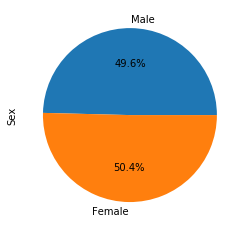

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import warnings 
warnings.filterwarnings('ignore')

gender2_df = clean_df.drop_duplicates(['Mouse ID','Sex'], keep='first')
gender2_df = gender2_df[['Mouse ID', 'Sex']]
gender_labels = gender2_df['Sex'].unique()
mouse_total = gender2_df.groupby('Sex').count()
#colors = ['mediumblue', 'orange']

plt.pie(mouse_total, labels = gender_labels, autopct="%1.1f%%")
#plt.figure(figsize=(5,5)) --??
plt.ylabel('Sex')
#plt.axis('equal') ---??



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  
tumor_volume = clean_df.drop_duplicates(['Mouse ID','Drug Regimen'], keep='last')
tumor_volume = tumor_volume[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
tumor_volume = tumor_volume.loc[(tumor_volume['Drug Regimen'] == 'Capomulin')
                               |(tumor_volume['Drug Regimen'] == 'Ramicane')
                               |(tumor_volume['Drug Regimen'] == 'Infubinol')
                               |(tumor_volume['Drug Regimen'] == 'Ceftamin'), :]
                                
tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1797,x822,Ceftamin,61.386660
1813,y163,Infubinol,67.685569
1845,y769,Ceftamin,68.594745
1855,y865,Ceftamin,64.729837


{'whiskers': [<matplotlib.lines.Line2D at 0x2960d1db780>,
 'caps': [<matplotlib.lines.Line2D at 0x2960d1dbdd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2960d1db470>,
 'medians': [<matplotlib.lines.Line2D at 0x2960d1ec4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2960d1ec7f0>,
 'means': []}

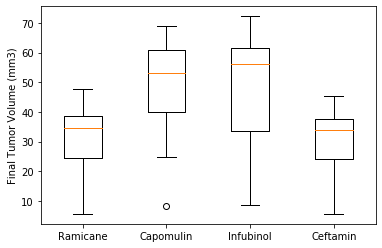

In [16]:
#trying something... is this even possible??

tumor_volume2 = tumor_volume[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').describe()
tumor_volume2.head()

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
#labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
labels = tumor_volume['Drug Regimen'].unique()
#labels2 = labels.sort()

ax1.boxplot(tumor_volume2, labels = labels)
#ax1.set_xlabel

Text(0, 0.5, 'Final Tumor Volume (mm3)')

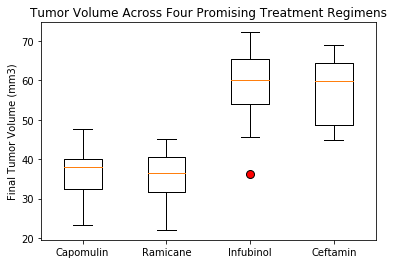

In [17]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  

cap_df = tumor_volume.loc[(tumor_volume['Drug Regimen'] == 'Capomulin'),:]
cap_df.head()
#fig1, ax1 = plt.subplots()
#ax1.boxplot(cap_df['Tumor Volume (mm3)'])

ram_df = tumor_volume.loc[(tumor_volume['Drug Regimen'] == 'Ramicane'),:]
ram_df.head()
#fig2, ax2 = plt.subplots()
#ax2.boxplot(ram_df['Tumor Volume (mm3)'])

inf_df = tumor_volume.loc[(tumor_volume['Drug Regimen'] == 'Infubinol'),:]
inf_df.head()
#fig3, ax3 = plt.subplots()
#ax3.boxplot(inf_df['Tumor Volume (mm3)'])

ceft_df = tumor_volume.loc[(tumor_volume['Drug Regimen'] == 'Ceftamin'),:]
ceft_df.head()
#fig4, ax4 = plt.subplots()
#ax4.boxplot(ceft_df['Tumor Volume (mm3)'])

labels = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

data = [cap_df['Tumor Volume (mm3)'],ram_df['Tumor Volume (mm3)'], inf_df['Tumor Volume (mm3)'], ceft_df['Tumor Volume (mm3)']]
red_circle = dict(markerfacecolor='r', markersize=8)
fig5, ax5 = plt.subplots()
ax5.set_title('Tumor Volume Across Four Promising Treatment Regimens') #change title???
ax5.boxplot(data, labels = labels, flierprops = red_circle)
plt.ylabel('Final Tumor Volume (mm3)')


In [18]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Capomulin Calculations
cap_series = cap_df['Tumor Volume (mm3)']
quartiles_cap = cap_series.quantile([0.25,0.5,0.75])
cap_lowerq = quartiles_cap[0.25]
cap_upperq = quartiles_cap[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

cap_outliers = cap_series.loc[(cap_series < cap_lower_bound) | (cap_series > cap_upper_bound)]

if not len(cap_outliers):
    print(f'No potential outliers found for Capomulin.\n')
else:
    print(f'The following may be potential outliers for Capomulin:\n')
    print(cap_outliers)

#Ramicane Calculations
ram_series = ram_df['Tumor Volume (mm3)']
quartiles_ram = ram_series.quantile([0.25,0.5,0.75])
ram_lowerq = quartiles_ram[0.25]
ram_upperq = quartiles_ram[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

ram_outliers = ram_series.loc[(ram_series < ram_lower_bound) | (ram_series > ram_upper_bound)]

if not len(ram_outliers):
    print(f'No potential outliers found for Ramicane.')
else:
    print(f'The following may be potential outliers for Ramicane:\n')
    print(ram_outliers)


No potential outliers found for Capomulin.

No potential outliers found for Ramicane.


In [19]:
#Infubinol Calculations    
inf_series = inf_df['Tumor Volume (mm3)']
quartiles_inf = inf_series.quantile([0.25,0.5,0.75])
inf_lowerq = quartiles_inf[0.25]
inf_upperq = quartiles_inf[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

inf_outliers = inf_df.loc[(inf_df['Tumor Volume (mm3)'] < inf_lower_bound) | 
                          (inf_df['Tumor Volume (mm3)'] > inf_upper_bound)]

if not len(inf_outliers):
    print(f'No potential outliers found for Infubinol.\n')
else:
    print(f'The following may be potential outliers for Infubinol:\n')
    print(inf_outliers)
    print(f'\n')
    
#Ceftamin Calculations    
ceft_series = ceft_df['Tumor Volume (mm3)']
quartiles_ceft = ceft_series.quantile([0.25,0.5,0.75])
ceft_lowerq = quartiles_ceft[0.25]
ceft_upperq = quartiles_ceft[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

ceft_outliers = ceft_df.loc[(ceft_df['Tumor Volume (mm3)'] < ceft_lower_bound) | 
                          (ceft_df['Tumor Volume (mm3)'] > ceft_upper_bound)]

if not len(ceft_outliers):
    print(f'No potential outliers found for Ceftamin.')
else:
    print(f'The following may be potential outliers for Ceftamin:\n')
    print(ceft_outliers)

The following may be potential outliers for Infubinol:

    Mouse ID Drug Regimen  Tumor Volume (mm3)
669     c326    Infubinol           36.321346


No potential outliers found for Ceftamin.


## Line and Scatter Plots

In [20]:
cap_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
64,f966,Capomulin,30.485985
104,u364,Capomulin,31.023923
124,y793,Capomulin,31.896238
134,r554,Capomulin,32.377357
144,m957,Capomulin,33.329098
164,t565,Capomulin,34.455298
204,i738,Capomulin,37.311846


Text(0.5, 1.0, 'Capomulin Treatment of Mouse s185')

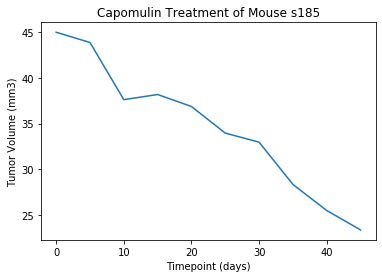

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
onemouse_cap = clean_df.loc[clean_df['Mouse ID']=='s185', :]
onemouse_cap_df = onemouse_cap[['Timepoint', 'Tumor Volume (mm3)']]
onemouse_cap_df
plt.plot(onemouse_cap_df['Timepoint'],onemouse_cap_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse s185')

Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume for Capomulin')

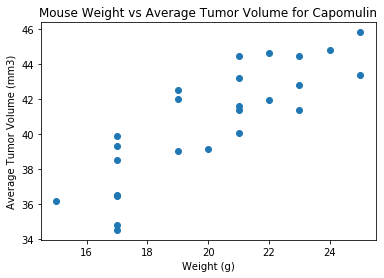

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_vol = clean_df.loc[clean_df['Drug Regimen']=='Capomulin', :]
weight = weight_vol[['Mouse ID', 'Weight (g)']]
weight_df = weight.groupby('Mouse ID').mean()

average_vol = weight_vol[['Mouse ID', 'Tumor Volume (mm3)']]
average_vol_df = average_vol.groupby('Mouse ID').mean()
plt.scatter(weight_df, average_vol_df)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')


## Correlation and Regression

The correlation coefficient, r, is: 0.8419363424694718
r-squared is: 0.7088568047708717


Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume for Capomulin')

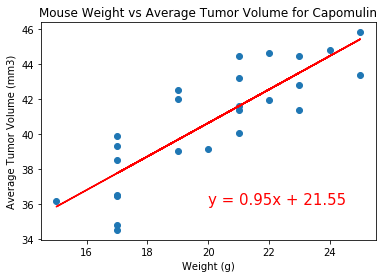

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.mstats.linregress(weight_df, average_vol_df)
regress_values = weight_df * slope + intercept
linreg_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The correlation coefficient, r, is: {rvalue}')
print(f'r-squared is: {rvalue**2}')
plt.scatter(weight_df, average_vol_df)
plt.plot(weight_df,regress_values,"r-")
plt.annotate(linreg_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
